In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/krish1407/Medical-Cost-Personal-Datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# One hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [4]:
X = insurance_one_hot.drop("charges",axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [6]:
y = insurance_one_hot["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [12]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [15]:
# Create a model for insurance data

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.SGD(),
  metrics = ["mae"]
)

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1919 - mae: 7718.1919
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8083.4829 - mae: 8083.4829
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4107 - mae: 7618.4107
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4977 - mae: 7678.4977
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7588.8130 - mae: 7588.8130
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7520.6838 - mae: 7520.68

In [17]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

We can see that our model has performed a bit well in training data(mae = 6880.6774) than the test data(mae = 7023.3291).

We got an error of nearly 7000 rupees we will check whether that error is significant.

In [20]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

The median is 9575 and the mean is 13346. But our error is 7023. Which is not at all acceptable. Since the error is more than 3/4th of the median nearly half of the mean. So we have to improve our model.

In [21]:
# Improving the model
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.Adam(lr=0.01),
  metrics = ["mae"]
)

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13267.1375 - mae: 13267.1375
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12704.6443 - mae: 12704.6443
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 11943.1168 - mae: 11943.1168
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 11658.7743 - mae: 11658.7743
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10260.3150 - mae: 10260.3150
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 8827.6743 - mae: 8827.6743
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7889.2777 - mae: 7889.2777
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7651.1220 - mae: 7651.1220
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7538.4327 - mae: 7538.4327
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7648.0213 - mae:

In [22]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 5243.4272 - mae: 5243.4272


[5243.42724609375, 5243.42724609375]

In [30]:
tf.random.set_seed(42)

insurance_model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model2.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.Adam(lr=0.01),
  metrics = ["mae"]
)

insurance_model2.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13267.1375 - mae: 13267.1375
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 12704.6443 - mae: 12704.6443
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 11943.1168 - mae: 11943.1168
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 11658.7743 - mae: 11658.7743
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 10260.3150 - mae: 10260.3150
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 8827.6743 - mae: 8827.6743
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 7889.2777 - mae: 7889.2777
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 7651.1220 - mae: 7651.1220
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 7538.4327 - mae: 7538.4327
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 7648.0213 - mae:

In [31]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3174.4656 - mae: 3174.4656


[3174.465576171875, 3174.465576171875]

In [32]:
tf.random.set_seed(42)

insurance_model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model3.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.Adam(lr=0.001),
  metrics = ["mae"]
)

insurance_model3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13298.3328 - mae: 13298.3328
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 12945.3002 - mae: 12945.3002
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 12705.8516 - mae: 12705.8516
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 13393.0255 - mae: 13393.0255
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 13305.0852 - mae: 13305.0852
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 13161.1847 - mae: 13161.1847
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 13182.2408 - mae: 13182.2408
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 13511.3947 - mae: 13511.3947
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 13284.3684 - mae: 13284.3684
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 13429.63

In [33]:
insurance_model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 6233.7979 - mae: 6233.7979


[6233.7978515625, 6233.7978515625]

So far our best model is Adam(lr=0.01) with epochs = 500

In [34]:
tf.random.set_seed(42)

insurance_model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model4.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.Adam(lr=0.01),
  metrics = ["mae"]
)

insurance_model4.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13149.7341 - mae: 13149.7341
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 10844.0065 - mae: 10844.0065
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 7097.0344 - mae: 7097.0344
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 7647.0350 - mae: 7647.0350
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 7459.0448 - mae: 7459.0448
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 7339.4584 - mae: 7339.4584
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 7135.4075 - mae: 7135.4075
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 7147.9290 - mae: 7147.9290
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 7031.6212 - mae: 7031.6212
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 7005.7944 - mae: 7005.

In [35]:
insurance_model4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5085 - mae: 3171.5085


[3171.508544921875, 3171.508544921875]

In [36]:
tf.random.set_seed(42)

insurance_model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(7),
  tf.keras.layers.Dense(1)
])

insurance_model5.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.Adam(lr=0.01),
  metrics = ["mae"]
)

insurance_model5.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13194.5811 - mae: 13194.5811
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 11529.3389 - mae: 11529.3389
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 7407.7850 - mae: 7407.7850
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 7690.8834 - mae: 7690.8834
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 7505.5494 - mae: 7505.5494
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 7388.5883 - mae: 7388.5883
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 7205.2544 - mae: 7205.2544
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 7229.2776 - mae: 7229.2776
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 7130.4568 - mae: 7130.4568
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 7135.6249 - mae: 7135.

In [37]:
insurance_model5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3182.9941 - mae: 3182.9941


[3182.994140625, 3182.994140625]

In [43]:
tf.random.set_seed(42)

insurance_model6 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(7),
  tf.keras.layers.Dense(1)
])

insurance_model6.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.Adam(lr=0.01),
  metrics = ["mae"]
)

history = insurance_model6.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
34/34 [==============================] - 0s 1ms/step - loss: 13194.5811 - mae: 13194.5811
Epoch 2/1000
34/34 [==============================] - 0s 1ms/step - loss: 11529.3389 - mae: 11529.3389
Epoch 3/1000
34/34 [==============================] - 0s 1ms/step - loss: 7407.7850 - mae: 7407.7850
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 7690.8834 - mae: 7690.8834
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 7505.5494 - mae: 7505.5494
Epoch 6/1000
34/34 [==============================] - 0s 1ms/step - loss: 7388.5883 - mae: 7388.5883
Epoch 7/1000
34/34 [==============================] - 0s 1ms/step - loss: 7205.2544 - mae: 7205.2544
Epoch 8/1000
34/34 [==============================] - 0s 1ms/step - loss: 7229.2776 - mae: 7229.2776
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 7130.4568 - mae: 7130.4568
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 7135.6249 - 

In [41]:
insurance_model6.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3247.5845 - mae: 3247.5845


Text(0.5, 0, 'epochs')

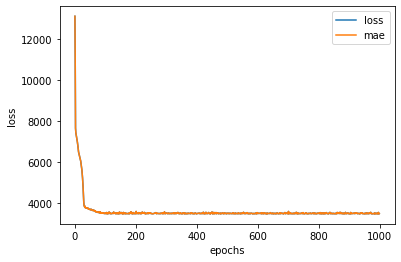

In [46]:
# Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

With the above graph we can see how the value of loss varies with respect to epochs.

An important question which needs to be answered here is for how long should we train the model. The answer is, it depends on the problem. For this kind of question tensorflow has given a solution.

Early stopping callback -----> A tensoflow component which we can add to our model to improve a certain metric. Suppose we are training a model for 100 epochs and after a point say, 70 the loss function hasn't improved significantly for close to say 10 iterations. We stop the training at that point itself.

### Preprocessing data - Standardisation and Normalisation
Neural networks tend to prefer Normalisation. It's enough to normalise only the input columns we dont have to normalise the output columns.
Our models converge faster when we apply normalisation. Eg: Suppose we get a loss of 1000 for 200 epochs in data which is not normalised. We will get the same loss of 1000 for 100 epochs itself, if we normalise the data. That is, the model converges faster. 

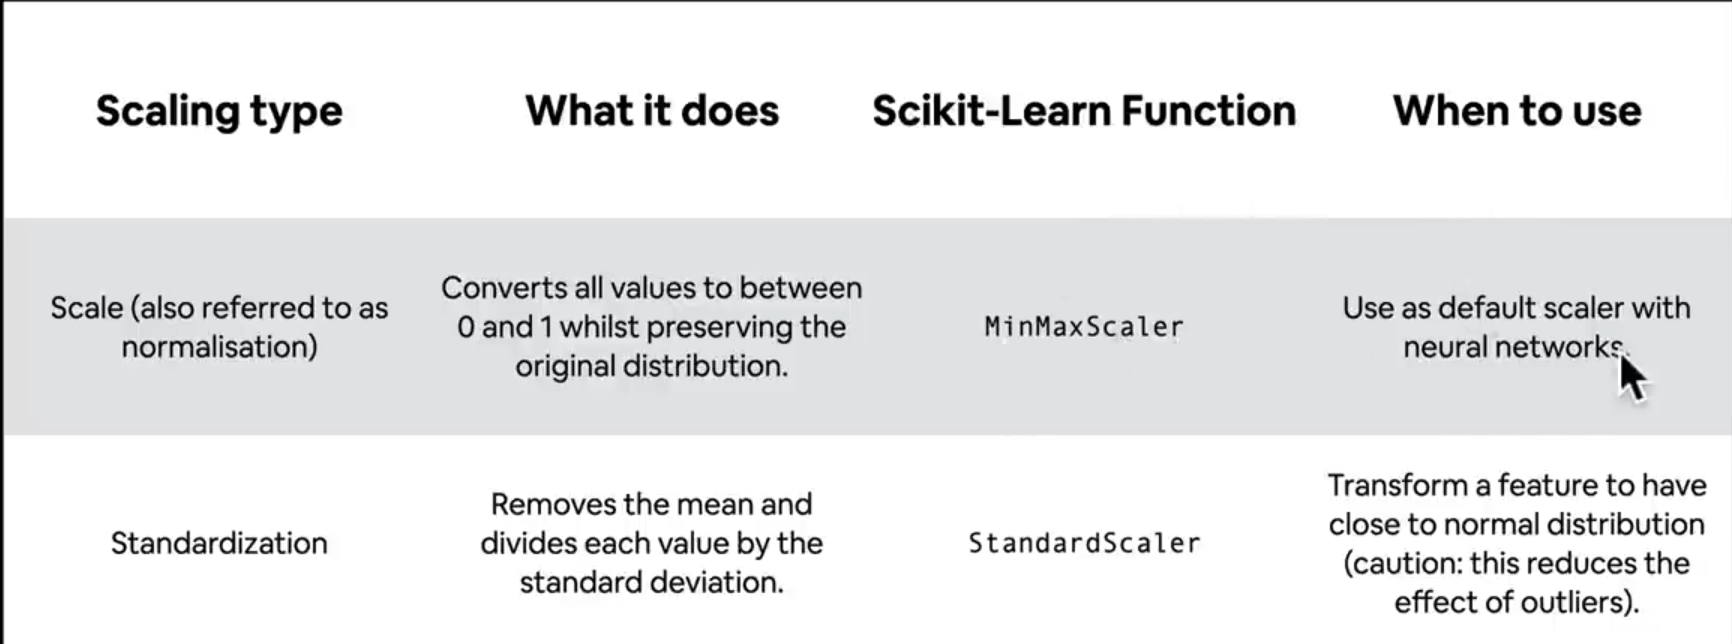

In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [51]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

insurance = pd.read_csv("https://raw.githubusercontent.com/krish1407/Medical-Cost-Personal-Datasets/master/insurance.csv")
insurance

# Create a column transformer
ct = make_column_transformer(
  (MinMaxScaler(), ["age","bmi","children"]),
  (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

X = insurance.drop("charges",axis = 1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We fit the column transformer from the training data, and we use that fit to transform the test data. 

We can't do it the other way because test data is not seen by the model. 

In [52]:
# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalisation (MinMaxScaler) and OneHotEncoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [55]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [56]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [57]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [59]:
# Construct the model with normalised data
# So far our best model is insurance_model2 Adam(lr=0.01) with epochs = 500

tf.random.set_seed(42)

insurance_model2_normalise = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model2_normalise.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.Adam(lr=0.01),
  metrics = ["mae"]
)

insurance_model2_normalise.fit(X_train_normal, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13295.9642 - mae: 13295.9642
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 12938.8630 - mae: 12938.8630
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 12672.7113 - mae: 12672.7113
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 13304.5018 - mae: 13304.5018
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 13132.3958 - mae: 13132.3958
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 12873.4154 - mae: 12873.4154
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 12751.8617 - mae: 12751.8617
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 12908.6174 - mae: 12908.6174
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 12483.1470 - mae: 12483.1470
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 12400.77

In [60]:

tf.random.set_seed(42)

insurance_model3_normalise = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model3_normalise.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.Adam(lr=0.01),
  metrics = ["mae"]
)

insurance_model3_normalise.fit(X_train_normal, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13254.8789 - mae: 13254.8789
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 11784.7705 - mae: 11784.7705
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 7911.8880 - mae: 7911.8880
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 7968.5020 - mae: 7968.5020
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 7328.0949 - mae: 7328.0949
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 6783.2004 - mae: 6783.2004
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 5888.1695 - mae: 5888.1695
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 4855.4473 - mae: 4855.4473
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 3780.6063 - mae: 3780.6063
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 3722.8480 - mae: 3722.